# Extended source spectrum

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## Download

In [2]:
/bin/rm -rf 869
download_chandra_obsid 869 --exclude vvref,osol,eph1


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      156 Mb  ####################            2 s  72556.6 kb/s
  evt2     fits       20 Mb  ####################          < 1 s  78294.9 kb/s
  asol     fits       12 Mb  ####################          < 1 s  69511.1 kb/s
  mtl      fits        2 Mb  ####################          < 1 s  43300.5 kb/s
  stat     fits        2 Mb  ####################          < 1 s  45693.1 kb/s
  aqual    fits      863 Kb  ####################          < 1 s  26957.9 kb/s
  cntr_img jpg       495 Kb  ####################          < 1 s  13594.6 kb/s
  bias     fits      494 Kb  ####################          < 1 s  20342.0 kb/s
  bias     fits      444 Kb  ####################          < 1 s  14723.5 kb/s
  bias     fits      441 Kb  ####################          < 1 s  17265.3 kb/s
  bias     fits      435 Kb  ####################    

In [3]:
/bin/rm -rf repro
chandra_repro 869 ./repro


Running chandra_repro
version: 14 September 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/extended/869'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running the destreak tool on the evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Output from acis_process_events:
# acis_process_events (CIAO 4.14): The following error occurred 81 times:
	dsAPEPULSEHEIGHTERR -- WARNING: pulse height is less than split threshold when performing serial CTI adjustment.
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/extended/repro/acisf00869_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel fil

## Regions

In [4]:
cat << EOM > simple.reg 
# Region file format: CIAO version 1.0
ellipse(4026.2341,4125.3693,50,40,0)
EOM

cat << EOM > simple_bkg.reg
# Region file format: CIAO version 1.0
circle(3955.5,4252.5,50)
EOM


[1] 25487
[1]+  Done                    ds9 repro/acisf00869_repro_evt2.fits -bin filter 'energy=500:7000' -bin about 4025 4140 -cmap b -scale log -region simple.reg -region simple_bkg.reg -saveimage png ds9_01.png


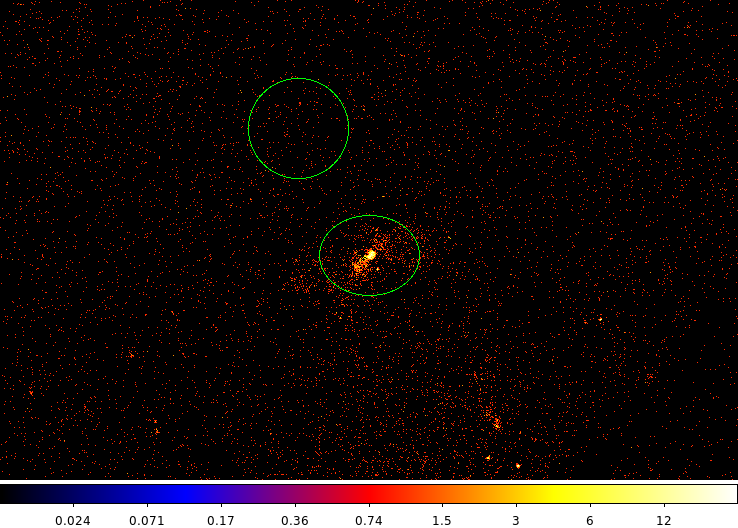

In [5]:
ds9 repro/acisf00869_repro_evt2.fits -bin filter 'energy=500:7000' \
    -bin about 4025 4140 -cmap b -scale log -region simple.reg \
    -region simple_bkg.reg \
    -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit


display < ds9_01.png

## using `specextract`

In [6]:
pset specextract infile="repro/acisf00869_repro_evt2.fits[sky=region(simple.reg)]"
pset specextract outroot=simple
pset specextract bkgfile="repro/acisf00869_repro_evt2.fits[sky=region(simple_bkg.reg)]"
specextract mode=h clob+

Running specextract
Version: 26 May 2021

Checking for blank sky background files...
Using event file repro/acisf00869_repro_evt2.fits[sky=region(simple.reg)]

Aspect solution file repro/pcadf00869_000N001_asol1.fits found.

Bad-pixel file repro/acisf00869_repro_bpix1.fits found.

Mask file repro/acisf00869_000N005_msk1.fits found.

Setting bad pixel file 

Extracting src spectra 

Creating src ARF 

Using mkacisrmf...

Creating src RMF 

Grouping src spectrum 

Updating header of simple.pi with RESPFILE and ANCRFILE keywords.

Updating header of simple_grp.pi with RESPFILE and ANCRFILE keywords.

Setting bad pixel file 

Extracting bkg spectra 

Creating bkg ARF 

Using mkacisrmf...

Creating bkg RMF 

Updating header of simple_bkg.pi with RESPFILE and ANCRFILE keywords.

Updating header of simple.pi with BACKFILE keyword.

Updating header of simple_grp.pi with BACKFILE keyword.



---
## Step By Step

### Extract spectra

In [7]:
pset dmextract infile="repro/acisf00869_repro_evt2.fits[sky=region(simple.reg)][bin pi]"
pset dmextract outfile=simple_steps.pi
pset dmextract wmap="[energy=300:2000][bin tdet=8]"
dmextract mode=h clob+ 

In [8]:
pset dmextract infile="repro/acisf00869_repro_evt2.fits[sky=region(simple_bkg.reg)][bin pi]"
pset dmextract outfile=simple_steps_bkg.pi
dmextract mode=h clob+

### asphist

In [9]:
cat repro/acisf00869_asol1.lis

/proj/sds/Staff/kjg/Threads/extended/869/primary/pcadf00869_000N001_asol1.fits


In [10]:
dmstat "repro/acisf00869_repro_evt2.fits[sky=region(simple.reg)][cols ccd_id]"

ccd_id
    min:	7 	      @:	1 
    max:	7 	      @:	1 
   mean:	7 
  sigma:	0 
    sum:	17906 
   good:	2558 
   null:	0 



In [11]:
dmstat "repro/acisf00869_repro_evt2.fits[sky=region(simple_bkg.reg)][cols ccd_id]"

ccd_id
    min:	7 	      @:	1 
    max:	7 	      @:	1 
   mean:	7 
  sigma:	0 
    sum:	10276 
   good:	1468 
   null:	0 



In [12]:
pset asphist infile=@-repro/acisf00869_asol1.lis
pset asphist outfile=simple_steps.asphist
pset asphist evtfile="repro/acisf00869_repro_evt2.fits[ccd_id=7]"
asphist mode=h cl+

In [13]:
dmstat "simple_steps.asphist[cols x_offbin,y_offbin]" sig- med-

POS_OFFBIN(X_OFFBIN, Y_OFFBIN)[bin]
    min:	( 1 1 )	      @:	( 1101 566 )
    max:	( 48 46 )	      @:	( 654 303 )
   mean:	( 24.214814815 23.456790123 )
    sum:	( 29421 28500 )
   good:	( 1215 1215 )
   null:	( 0 0 )



In [14]:
dmcopy simple_steps.asphist"[bin x_offbin=1:50:1,y_offbin=1:50:1;duration]" asphist.img clob+

In [15]:
ds9 asphist.img -scale linear -cmap bb \
  -zoom to fit -saveimage png asphist.png &
sleep 10
xpaset -p ds9 quit

display < asphist.png

[1] 25814
[1]+  Done                    ds9 asphist.img -scale linear -cmap bb -zoom to fit -saveimage png asphist.png


### Create WMAPs

In [16]:
pset sky2tdet infile="repro/acisf00869_repro_evt2.fits[sky=region(simple.reg)][energy=300:2000][bin sky=1]"
pset sky2tdet asphistfile="simple_steps.asphist"
pset sky2tdet outfile="simple_steps_tdet.fits[wmap]"
sky2tdet mode=h clob+


[1] 25887
[1]+  Done                    ds9 simple_steps_tdet.fits -scale asinh -zoom to fit -cmap load ${ASCDS_CONTRIB}/data/heart.lut -saveimage png wmap.src.png


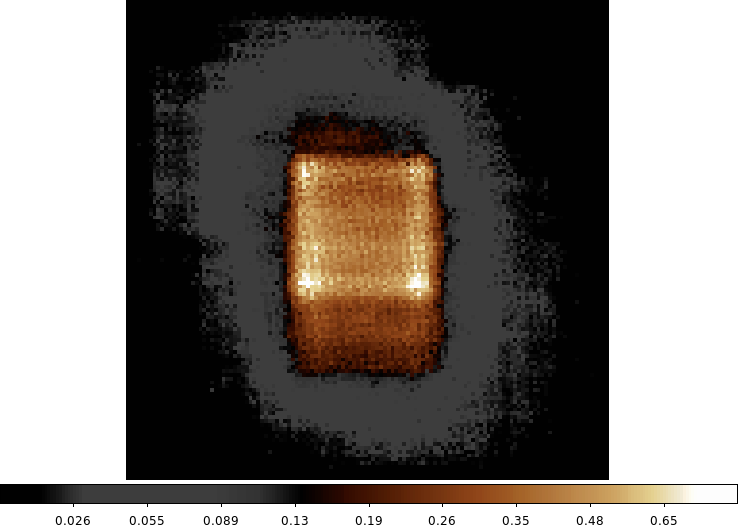

In [17]:
ds9 simple_steps_tdet.fits -scale asinh -zoom to fit -cmap load ${ASCDS_CONTRIB}/data/heart.lut \
  -saveimage png wmap.src.png &
sleep 10
xpaset -p ds9 quit


display < wmap.src.png

In [18]:
pset sky2tdet infile="repro/acisf00869_repro_evt2.fits[sky=region(simple_bkg.reg)][energy=300:2000][bin sky=1]"
pset sky2tdet outfile="simple_steps_bkg_tdet.fits[wmap]"
sky2tdet mode=h clob+


[1] 25933
[1]+  Done                    ds9 simple_steps_bkg_tdet.fits -scale asinh -zoom to fit -cmap load ${ASCDS_CONTRIB}/data/heart.lut -saveimage png wmap.bkg.png


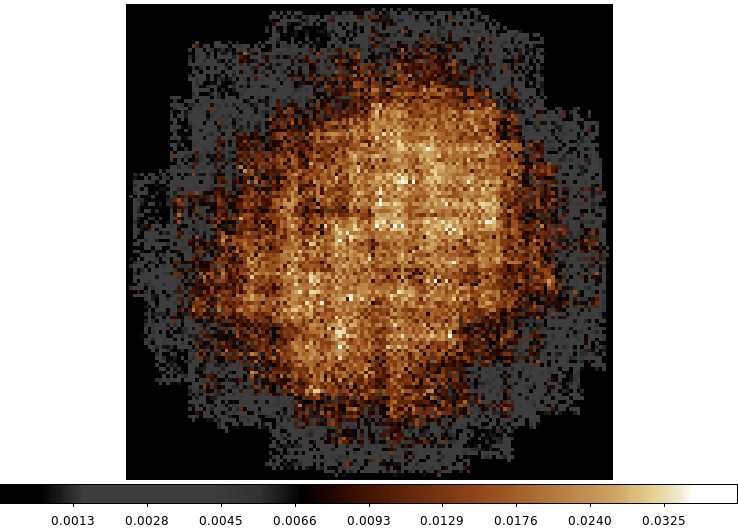

In [19]:
ds9 simple_steps_bkg_tdet.fits -scale asinh -zoom to fit -cmap load ${ASCDS_CONTRIB}/data/heart.lut \
  -saveimage png wmap.bkg.png &
sleep 10
xpaset -p ds9 quit


display < wmap.bkg.png

### Create ARFs

In [20]:
pset mkwarf infile="simple_steps_tdet.fits[wmap]"
pset mkwarf outfile=simple_steps.arf
pset mkwarf weightfile=simple_steps.wfef
pset mkwarf egridspec=0.3:11.0:0.01 
pset mkwarf mskfile=repro/acisf00869_000N005_msk1.fits
mkwarf mode=h clob+

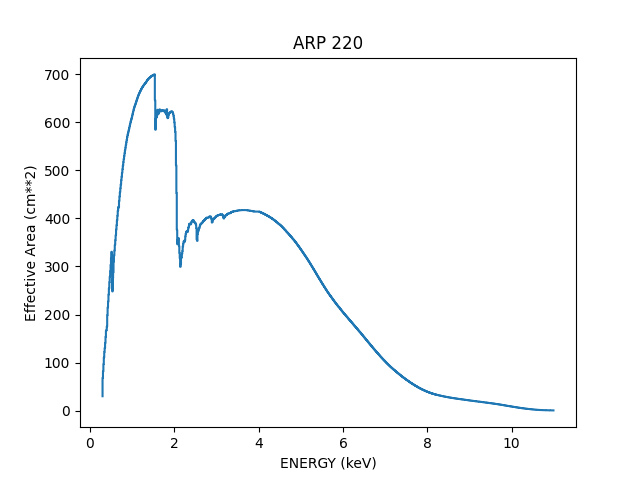

In [21]:
cat << EOM > c1.py
from pycrates import read_file
import matplotlib.pylab as plt

tab = read_file("simple_steps.arf")
xx = tab.get_column("energ_lo").values
yy = tab.get_column("specresp").values

plt.plot(xx,yy,marker="None", drawstyle="steps-pre")
plt.xlabel("ENERGY (keV)")
plt.ylabel("Effective Area (cm**2)")
plt.title("ARP 220")

plt.savefig("arf.src.png")
EOM

python c1.py
display < arf.src.png

In [22]:
pset mkwarf infile="simple_steps_bkg_tdet.fits[wmap]"
pset mkwarf outfile=simple_steps_bkg.arf
pset mkwarf weightfile=simple_steps_bkg.wfef
mkwarf mode=h clob+


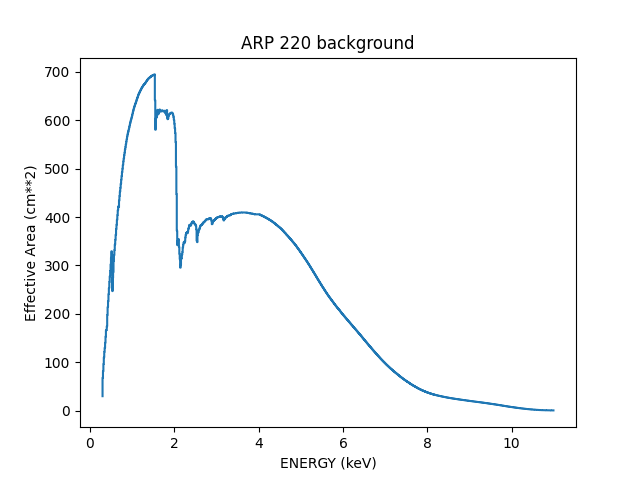

In [23]:
cat << EOM > c2.py
from pycrates import read_file
import matplotlib.pylab as plt

tab = read_file("simple_steps_bkg.arf")
xx = tab.get_column("energ_lo").values
yy = tab.get_column("specresp").values

plt.plot(xx,yy,marker="None", drawstyle="steps-pre")
plt.xlabel("ENERGY (keV)")
plt.ylabel("Effective Area (cm**2)")
plt.title("ARP 220 background")

plt.savefig("arf.bkg.png")
EOM

python c2.py
display < arf.bkg.png

### RMF


#### mkacisrmf

In [24]:
pset mkacisrmf infile=CALDB
pset mkacisrmf outfile=simple_steps_mkacisrmf.rmf
pset mkacisrmf energy=0.3:11.0:0.01
pset mkacisrmf channel=1:1024:1
pset mkacisrmf wmap="simple_steps.pi[WMAP]"
mkacisrmf mode=h clob+



Total 17 regions to be processed:
    1> reg# 9455  processed
    2> reg# 9456  processed
    3> reg# 9457  processed
    4> reg# 9458  processed
    5> reg# 9486  processed
    6> reg# 9487  processed
    7> reg# 9488  processed
    8> reg# 9489  processed
    9> reg# 9490  processed
   10> reg# 9518  processed
   11> reg# 9519  processed
   12> reg# 9520  processed
   13> reg# 9521  processed
   14> reg# 9522  processed
   15> reg# 9551  processed
   16> reg# 9552  processed
   17> reg# 9553  processed



[1] 26109
[1]+  Done                    ds9 simple_steps_mkacisrmf.img -scale log -zoom to fit -cmap load $ASCDS_CONTRIB/data/icool.lut -saveimage png rmf.src.png


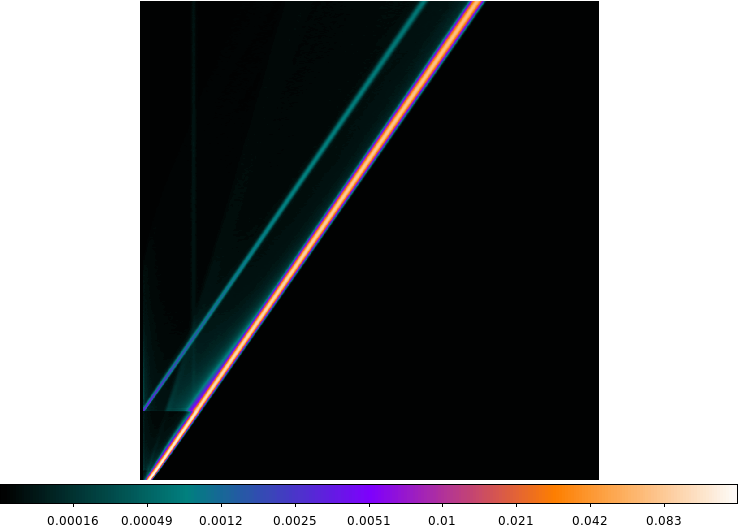

In [25]:
rmfimg simple_steps_mkacisrmf.rmf simple_steps_mkacisrmf.img clob+
ds9 simple_steps_mkacisrmf.img -scale log -zoom to fit \
  -cmap load $ASCDS_CONTRIB/data/icool.lut \
  -saveimage png rmf.src.png &
sleep 10
xpaset -p ds9 quit

display < rmf.src.png

In [26]:
pset mkacisrmf outfile=simple_steps_bkg_mkacisrmf.rmf
pset mkacisrmf wmap="simple_steps_bkg.pi[WMAP]"
mkacisrmf mode=h clob+




Total 17 regions to be processed:
    1> reg# 9585  processed
    2> reg# 9586  processed
    3> reg# 9587  processed
    4> reg# 9616  processed
    5> reg# 9617  processed
    6> reg# 9618  processed
    7> reg# 9619  processed
    8> reg# 9648  processed
    9> reg# 9649  processed
   10> reg# 9650  processed
   11> reg# 9651  processed
   12> reg# 9680  processed
   13> reg# 9681  processed
   14> reg# 9682  processed
   15> reg# 9683  processed
   16> reg# 9713  processed
   17> reg# 9714  processed



In [27]:
rmfimg simple_steps_bkg_mkacisrmf.rmf simple_steps_bkg_mkacisrmf.img clob+
ds9 simple_steps_bkg_mkacisrmf.img -scale log -zoom to fit \
  -cmap load $ASCDS_CONTRIB/data/icool.lut \
  -saveimage png rmf.bkg.png &
sleep 10
xpaset -p ds9 quit

display < rmf.bkg.png

[1] 26199
[1]+  Done                    ds9 simple_steps_bkg_mkacisrmf.img -scale log -zoom to fit -cmap load $ASCDS_CONTRIB/data/icool.lut -saveimage png rmf.bkg.png


#### Using mkrmf

In [28]:
pset mkrmf infile=CALDB
pset mkrmf outfile=simple_steps_mkrmf.rmf
pset mkrmf axis1="energy=0:1"
pset mkrmf axis2="pi=1:1024:1"
pset mkrmf weights=simple_steps.wfef
mkrmf mode=h clob+

In [29]:
pset mkrmf outfile=simple_steps_bkg_mkrmf.rmf
pset mkrmf weights=simple_steps_bkg.wfef
mkrmf mode=h clob+

### Group

In [30]:
pset dmgroup infile=simple_steps.pi
pset dmgroup outfile=simple_steps_grp.pi
pset dmgroup grouptype=NUM_CTS 
pset dmgroup grouptypeval=15
pset dmgroup xcolumn=channel
pset dmgroup ycolumn=counts
dmgroup mode=h clob+

In [31]:
cat << EOM > c3.py
from pycrates import read_file
import matplotlib.pylab as plt

tab = read_file("simple_steps_grp.pi")
xx = tab.get_column("channel").values[:1000]
yy = tab.get_column("grp_data").values[:1000]

plt.plot(xx,yy,marker="None", drawstyle="steps-pre")
plt.xlabel("Channe")
plt.ylabel("Counts")
plt.title("ARP 220 spectrum")

plt.savefig("pha_grp.src.png")
EOM

python c3.py
display < pha_grp.src.png 


### Update Headers


In [32]:
pset dmhedit operation=add filelist="" mode=h

dmhedit simple_steps.pi key=BACKFILE value=simple_steps_bkg.pi
dmhedit simple_steps.pi key=RESPFILE value=simple_steps_mkacisrmf.rmf
dmhedit simple_steps.pi key=ANCRFILE value=simple_steps_corr.arf

dmhedit simple_steps_grp.pi key=BACKFILE value=simple_steps_bkg.pi
dmhedit simple_steps_grp.pi key=RESPFILE value=simple_steps_mkacisrmf.rmf
dmhedit simple_steps_grp.pi key=ANCRFILE value=simple_steps.arf

In [33]:
dmhedit simple_steps_bkg.pi operation=add key=RESPFILE value=simple_steps_bkg_mkacisrmf.rmf
dmhedit simple_steps_bkg.pi operation=add key=ANCRFILE value=simple_steps_bkg.arf

read RMF file simple_steps_mkacisrmf.rmf
read ARF (background) file simple_steps_bkg.arf
read RMF (background) file simple_steps_bkg_mkacisrmf.rmf
read background file simple_steps_bkg.pi


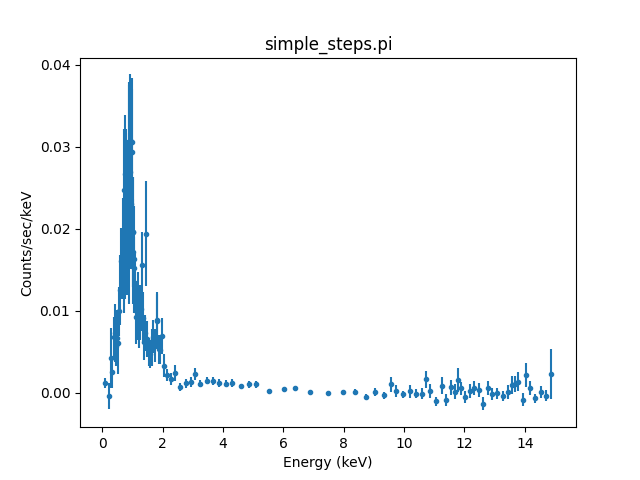

In [34]:
cat << EOM > s1.py
import sherpa.astro.ui as ui
import matplotlib.pylab as plt


ui.load_data("simple_steps.pi")
ui.group_counts(15)
ui.subtract()
ui.plot_data()

plt.savefig("sherpa.png")
EOM

python s1.py
display < sherpa.png

---

## Extracting multiple spectra

In [35]:
/bin/rm -rf 1842 1843
download_chandra_obsid 1842,1843 --quiet --exclude=vvref,osol,eph1,evt2
chandra_repro 1842,1843 out= 


Running chandra_repro
version: 14 September 2021



Processing input directory '/proj/sds/Staff/kjg/Threads/extended/1842'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/extended/1842/repro/acisf01842_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...

Cleaning up intermediate files

The data have been reprocessed.
Start your analysis with the new products in
/proj/sds/Staff/kjg/Threads/extended/1842/repro


Processing input directory '/proj/sds/Staff/kjg/Threads/extended/1843'

No boresight correction update to asol file is needed.
Resetting afterglow s

In [36]:
/bin/rm -rf multi_reproj
reproject_obs 1842,1843 multi_reproj/ clob+

Running reproject_obs
Version: 05 November 2020

Found 1842/repro/acisf01842_repro_evt2.fits
Found 1843/repro/acisf01843_repro_evt2.fits
Verifying 2 observations.
Calculating new tangent point.
New tangent point: RA=18h 32m 21.347s Dec=-10d 34' 38.44"

Observations to be reprojected:

  Obsid  Obs Date   Exp    DETNAM     SIM_Z    FP   Sepn   PA  
                   (ks)                (mm)    (K)   (')  (deg)
---------------------------------------------------------------
1 1843  2000-09-02   7.9 ACIS-012367 -245.857 153.4   2.6   -79
2 1842  2000-09-02   7.4 ACIS-012367 -231.239 153.4   2.6  +101

Running tasks in parallel with 4 processors.
Reprojecting 2 event files to a common tangent point.
Merging reprojected events files to multi_reproj/merged_evt.fits

The following files were created:

The reprojected event files:
     multi_reproj/1843_reproj_evt.fits
     multi_reproj/1842_reproj_evt.fits

The merged event file:
     multi_reproj/merged_evt.fits

   should not be used to cr

### Regions

In [37]:
cat << EOM > 1842_src.reg
# Region file format: CIAO version 1.0
circle(1943.3,4164.2,102)
EOM

cat << EOM > 1843_src.reg
# Region file format: CIAO version 1.0
circle(1943.3,4164.2,135)
EOM

cat << EOM > 1842_bg.reg
# Region file format: CIAO version 1.0
circle(2259.3,4072.3,100)
EOM

cat << EOM > 1843_bg.reg
# Region file format: CIAO version 1.0
circle(2361.5,4104.8,140)
EOM


[1] 27178
[1]+  Done                    ds9 multi_reproj/1842_reproj_evt.fits -bin filter 'energy=500:7000' -bin about 2000 4150 -bin factor 2 -cmap b -region 1842_src.reg -region 1842_bg.reg multi_reproj/1843_reproj_evt.fits -bin filter 'energy=500:7000' -bin about 2000 4150 -bin factor 2 -cmap b -region 1843_src.reg -region 1843_bg.reg -tile row -saveimage png multi_obi.png


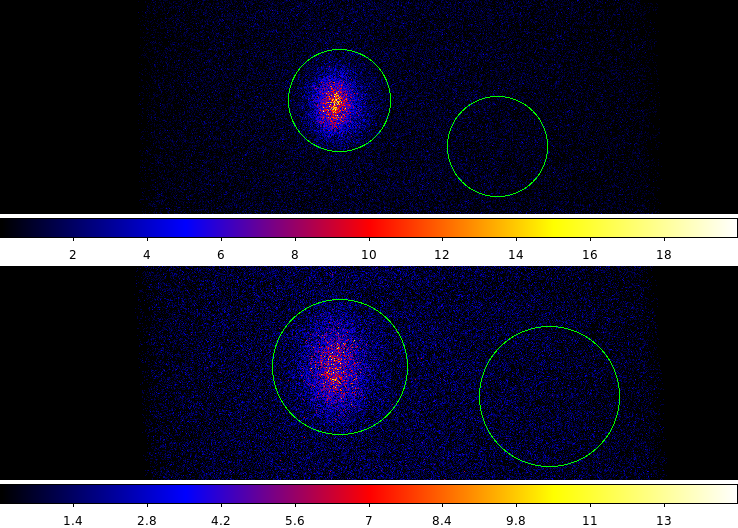

In [38]:
ds9 multi_reproj/1842_reproj_evt.fits -bin filter 'energy=500:7000' \
  -bin about 2000 4150 -bin factor 2 -cmap b -region 1842_src.reg -region 1842_bg.reg \
  multi_reproj/1843_reproj_evt.fits -bin filter 'energy=500:7000' \
  -bin about 2000 4150 -bin factor 2 -cmap b -region 1843_src.reg \
  -region 1843_bg.reg -tile row \
  -saveimage png multi_obi.png &
sleep 10
xpaset -p ds9 quit


display < multi_obi.png

In [39]:
cat << EOM > multi_src.lis
multi_reproj/1842_reproj_evt.fits[sky=region(1842_src.reg)]
multi_reproj/1843_reproj_evt.fits[sky=region(1843_src.reg)]
EOM


In [40]:
cat << EOM > multi_bg.lis
multi_reproj/1842_reproj_evt.fits[sky=region(1842_bg.reg)]
multi_reproj/1843_reproj_evt.fits[sky=region(1843_bg.reg)]
EOM

In [41]:
/bin/rm -rf spec
mkdir -p spec
pset specextract infile=@-multi_src.lis
pset specextract outroot=spec/1842,spec/1843
pset specextract bkgfile=@-multi_bg.lis
specextract mode=h clob+


Running specextract
Version: 26 May 2021

Checking for blank sky background files...
Using event file multi_reproj/1842_reproj_evt.fits[sky=region(1842_src.reg)]

Aspect solution file multi_reproj/1842.asol found.

Bad-pixel file multi_reproj/1842.bpix found.

Mask file multi_reproj/1842.mask found.

Using event file multi_reproj/1843_reproj_evt.fits[sky=region(1843_src.reg)]

Aspect solution file multi_reproj/1843.asol found.

Bad-pixel file multi_reproj/1843.bpix found.

Mask file multi_reproj/1843.mask found.

Setting bad pixel file [1 of 2]

Extracting src spectra [1 of 2]

Creating src ARF [1 of 2]

Using mkacisrmf...

Creating src RMF [1 of 2]

Grouping src spectrum [1 of 2]

Updating header of spec/1842.pi with RESPFILE and ANCRFILE keywords.

Updating header of spec/1842_grp.pi with RESPFILE and ANCRFILE keywords.

Setting bad pixel file [2 of 2]

Extracting src spectra [2 of 2]

Creating src ARF [2 of 2]

Using mkacisrmf...

Creating src RMF [2 of 2]

Grouping src spectrum [2 

In [42]:
combine_spectra spec/1842.pi,spec/1843.pi spec/combo clob+

Prepared to combine 2 spectra

source PHA: spec/1842.pi
       ARF: 1842.arf
       RMF: 1842.rmf
    background PHA: 1842_bkg.pi
               ARF: 1842_bkg.arf
               RMF: 1842_bkg.rmf
source PHA: spec/1843.pi
       ARF: 1843.arf
       RMF: 1843.rmf
    background PHA: 1843_bkg.pi
               ARF: 1843_bkg.arf
               RMF: 1843_bkg.rmf

The following files were created:
  spec/combo_src.pi
  spec/combo_bkg.pi
  spec/combo_src.arf
  spec/combo_bkg.arf
  spec/combo_src.rmf
  spec/combo_bkg.rmf


In [43]:
cat << EOM > s2.py
from sherpa.astro.ui import *
import matplotlib.pylab as plt
load_data("spec/combo_src.pi")
notice(0.3, 7)
group_counts(40)
plot_data()
plt.xscale("log")
plt.yscale("log")

subtract()
plot_data(overplot=True)

plt.savefig("multi_obi_src.png")

EOM

python s2.py
display < multi_obi_src.png



read ARF file spec/combo_src.arf
read RMF file spec/combo_src.rmf
read ARF (background) file spec/combo_bkg.arf
read RMF (background) file spec/combo_bkg.rmf
read background file spec/combo_bkg.pi


# Cleanup


In [44]:
mv -fv multi_reproj/merged_evt.fits ./
mv -fv spec/* ./
/bin/rm -rf spec multi_reproj 1842 1843 869


'multi_reproj/merged_evt.fits' -> './merged_evt.fits'
'spec/1842.arf' -> './1842.arf'
'spec/1842.pi' -> './1842.pi'
'spec/1842.rmf' -> './1842.rmf'
'spec/1842_bkg.arf' -> './1842_bkg.arf'
'spec/1842_bkg.pi' -> './1842_bkg.pi'
'spec/1842_bkg.rmf' -> './1842_bkg.rmf'
'spec/1842_grp.pi' -> './1842_grp.pi'
'spec/1843.arf' -> './1843.arf'
'spec/1843.pi' -> './1843.pi'
'spec/1843.rmf' -> './1843.rmf'
'spec/1843_bkg.arf' -> './1843_bkg.arf'
'spec/1843_bkg.pi' -> './1843_bkg.pi'
'spec/1843_bkg.rmf' -> './1843_bkg.rmf'
'spec/1843_grp.pi' -> './1843_grp.pi'
'spec/combo_bkg.arf' -> './combo_bkg.arf'
'spec/combo_bkg.pi' -> './combo_bkg.pi'
'spec/combo_bkg.rmf' -> './combo_bkg.rmf'
'spec/combo_src.arf' -> './combo_src.arf'
'spec/combo_src.pi' -> './combo_src.pi'
'spec/combo_src.rmf' -> './combo_src.rmf'
